In [78]:
from tqdm import tqdm
import os

train_dir = 'D:/KAES/Green/train'

# Setup empty lists to fill
labels_train = []
texts_train = []

# First go through the negatives, then through the positives
for label_type in ['neg', 'pos']:
    # Get the sub path
    dir_name = os.path.join(train_dir, label_type)
    print('loading ',label_type)
    # Loop over all files in path
    for fname in tqdm(os.listdir(dir_name)):
        
        # Only consider text files
        if fname[-4:] == '.txt':
            # Read the text file and put it in the list
            f = open(os.path.join(dir_name, fname),encoding="utf-8")
            texts_train.append(f.read())
            f.close()
            # Attach the corresponding label
            if label_type == 'neg':
                labels_train.append(0)
            else:
                labels_train.append(1)

  7%|█████                                                                       | 862/12822 [00:00<00:01, 8619.00it/s]

loading  neg


 14%|██████████▊                                                                | 1804/12500 [00:00<00:01, 9028.48it/s]

loading  pos


100%|██████████████████████████████████████████████████████████████████████████| 12500/12500 [00:01<00:00, 8826.29it/s]


In [79]:
import os

test_dir = 'D:/KAES/Green/test'

# Setup empty lists to fill
labels_test = []
texts_test = []

# First go through the negatives, then through the positives
for label_type in ['neg', 'pos']:
    # Get the sub path
    dir_name = os.path.join(test_dir, label_type)
    print('loading ',label_type)
    # Loop over all files in path
    for fname in tqdm(os.listdir(dir_name)):
        
        # Only consider text files
        if fname[-4:] == '.txt':
            # Read the text file and put it in the list
            f = open(os.path.join(dir_name, fname),encoding="utf-8")
            texts_test.append(f.read())
            f.close()
            # Attach the corresponding label
            if label_type == 'neg':
                labels_test.append(0)
            else:
                labels_test.append(1)

  7%|█████▎                                                                      | 880/12500 [00:00<00:01, 8798.06it/s]

loading  neg


  7%|█████▏                                                                      | 857/12500 [00:00<00:01, 8569.35it/s]

loading  pos


100%|██████████████████████████████████████████████████████████████████████████| 12500/12500 [00:01<00:00, 9135.36it/s]


In [80]:
for i, element in enumerate(texts_train):
    element = element.replace('<br />','')
    texts_train[i] = element

In [81]:
for i, element in enumerate(texts_test):
    element = element.replace('<br />','')
    texts_test[i] = element

In [82]:
print('Label',labels_train[12821])
print(texts_train[12821])

Label 0
This is one of the dumbest films, I've ever seen. It rips off nearly ever type of thriller and manages to make a mess of them all.There's not a single good line or character in the whole mess. If there was a plot, it was an afterthought and as far as acting goes, there's nothing good to say so Ill say nothing. I honestly cant understand how this type of nonsense gets produced and actually released, does somebody somewhere not at some stage think, 'Oh my god this really is a load of shite' and call it a day. Its crap like this that has people downloading illegally, the trailer looks like a completely different film, at least if you have download it, you haven't wasted your time or money Don't waste your time, this is painful.


In [83]:
import pandas as pd
df = pd.DataFrame(texts_train, columns =['reviews'])
df1=pd.DataFrame(labels_train, columns =['labels'])
dataframe_train=pd.concat([df,df1], axis=1)

In [84]:
df = pd.DataFrame(texts_test, columns =['reviews'])
df1=pd.DataFrame(labels_test, columns =['labels'])
dataframe_test=pd.concat([df,df1], axis=1)

In [85]:
dataframe_train=dataframe_train.dropna()
dataframe_train=dataframe_train.drop_duplicates()

dataframe_test=dataframe_test.dropna()
dataframe_train=dataframe_test.drop_duplicates()

In [86]:
dataframe_train.labels.unique()

array([0, 1], dtype=int64)

In [87]:
dataframe_test.labels.unique()

array([0, 1], dtype=int64)

In [88]:
dataframe_test

reviews  labels
0      Once again Mr. Costner has dragged out a movie...       0
1      This is an example of why the majority of acti...       0
2      First of all I hate those moronic rappers, who...       0
3      Not even the Beatles could write songs everyon...       0
4      Brass pictures (movies is not a fitting word f...       0
...                                                  ...     ...
24995  I was extraordinarily impressed by this film. ...       1
24996  Although I'm not a golf fan, I attended a snea...       1
24997  From the start of "The Edge Of Love", the view...       1
24998  This movie, with all its complexity and subtle...       1
24999  I've seen this story before but my kids haven'...       1

[25000 rows x 2 columns]

In [89]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re


stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egoro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
def preprocess(text,stem=True):
    text= re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [91]:
dataframe_train.reviews=dataframe_train.reviews.apply(lambda x: preprocess(x))

D:\Anaconda\envs\name_X\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [92]:
dataframe_test.reviews=dataframe_test.reviews.apply(lambda x: preprocess(x))

In [93]:
dataframe_train

reviews  labels
0      mr costner drag movi far longer necessari asid...       0
1      exampl major action film generic bore realli n...       0
2      first hate moron rapper could nt act gun press...       0
3      even beatl could write song everyon like altho...       0
4      brass pictur movi fit word realli somewhat bra...       0
...                                                  ...     ...
24995  extraordinarili impress film one best sport fi...       1
24996  although golf fan attend sneak preview movi ab...       1
24997  start edg love viewer transport strike world w...       1
24998  movi complex subtleti make one thought provok ...       1
24999  seen stori kid boy troubl past join militari f...       1

[24801 rows x 2 columns]

In [94]:
dataframe_test

reviews  labels
0      mr costner drag movi far longer necessari asid...       0
1      exampl major action film generic bore realli n...       0
2      first hate moron rapper could nt act gun press...       0
3      even beatl could write song everyon like altho...       0
4      brass pictur movi fit word realli somewhat bra...       0
...                                                  ...     ...
24995  extraordinarili impress film one best sport fi...       1
24996  although golf fan attend sneak preview movi ab...       1
24997  start edg love viewer transport strike world w...       1
24998  movi complex subtleti make one thought provok ...       1
24999  seen stori kid boy troubl past join militari f...       1

[25000 rows x 2 columns]

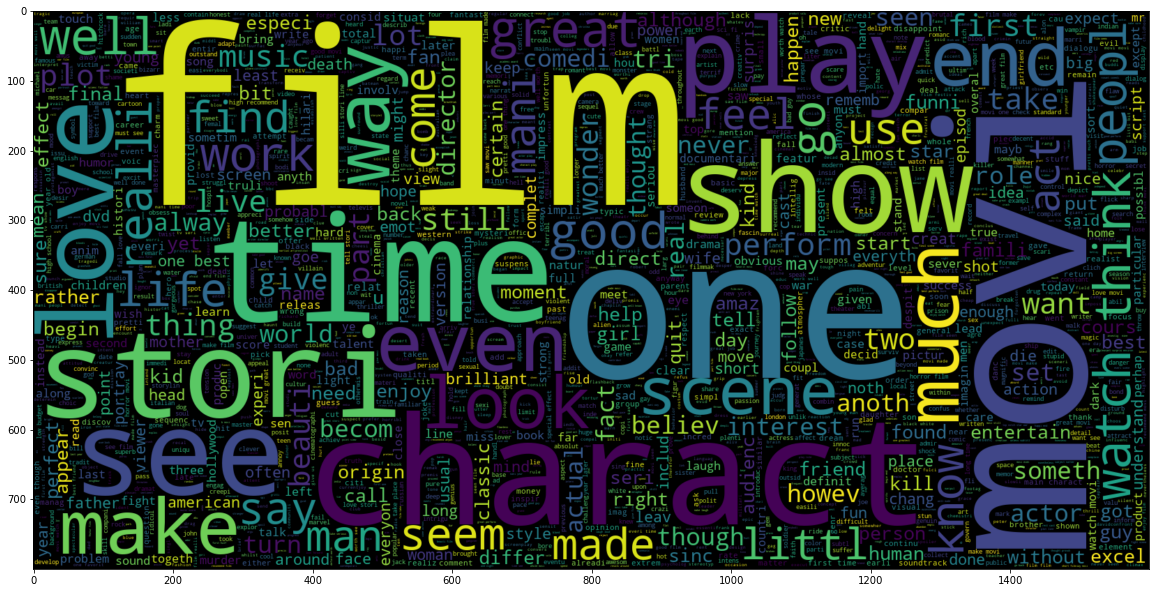

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataframe_train[dataframe_train.labels == 1].reviews))
plt.imshow(wc , interpolation = 'bilinear')

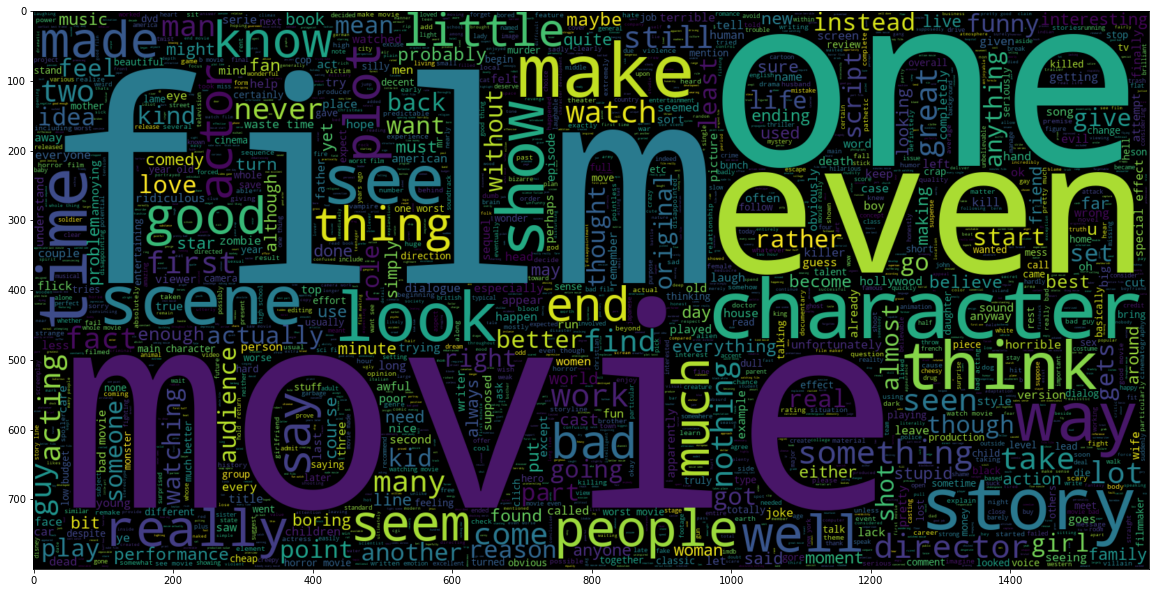

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataframe_train[dataframe_train.labels == 0].reviews))
plt.imshow(wc , interpolation = 'bilinear')

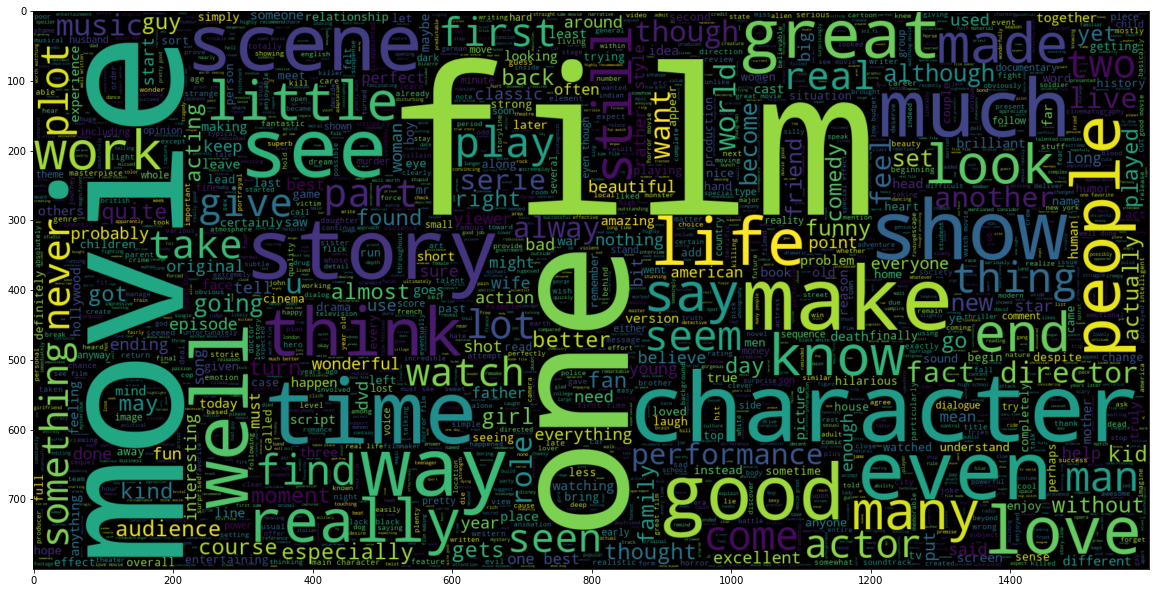

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataframe_test[dataframe_test.labels == 1].reviews))
plt.imshow(wc , interpolation = 'bilinear')

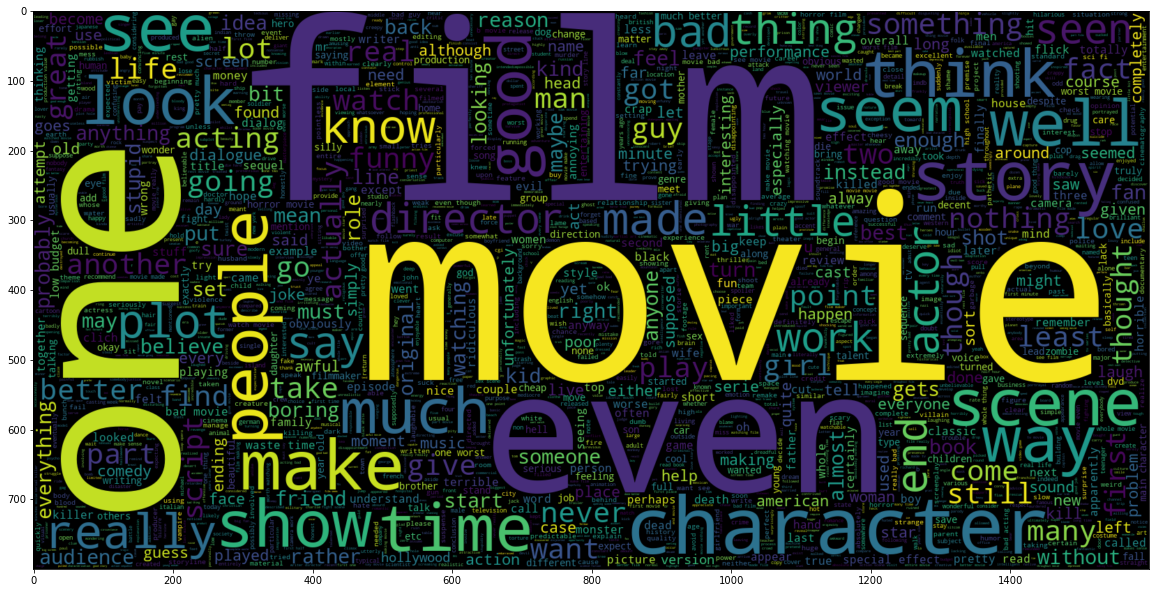

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataframe_test[dataframe_test.labels == 0].reviews))
plt.imshow(wc , interpolation = 'bilinear')

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
x_train = vect.fit_transform(dataframe_train.reviews)
x_test = vect.transform(dataframe_test.reviews)
y_train=dataframe_train.labels
y_test=dataframe_test.labels

<24801x50658 sparse matrix of type '<class 'numpy.float64'>'
	with 2298674 stored elements in Compressed Sparse Row format>

In [27]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix



In [ ]:
clf = LogisticRegression(n_jobs=-1)

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
    
}



params = \
     {'solver': ['saga'],  
     'penalty':['l1', 'l2', 'elasticnet'] , 
     'C': np.arange(0.1, 1.1, 0.1)
      }


In [27]:
refit_score='accuracy_score'
skf = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(clf, params, scoring=scorers, refit=refit_score,cv=skf, n_jobs=-1)


grid_search.fit(x_train, y_train)

print('Best params for {}'.format(refit_score))
print(grid_search.best_params_)


Best params for accuracy_score
{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}


In [28]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_accuracy_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_solver','param_penalty', 'param_C']].round(3).head()

mean_test_precision_score  mean_test_recall_score  \
28                      0.884                   0.904   
25                      0.884                   0.904   
22                      0.882                   0.903   
19                      0.880                   0.903   
16                      0.878                   0.902   

    mean_test_accuracy_score param_solver param_penalty param_C  
28                     0.894         saga            l2       1  
25                     0.894         saga            l2     0.9  
22                     0.893         saga            l2     0.8  
19                     0.891         saga            l2     0.7  
16                     0.890         saga            l2     0.6

In [97]:
import time

startTime = time.time() 

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(solver='saga',n_jobs=-1)
clf.fit(x_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(x_test)))


endTime = time.time() 
totalTime = endTime - startTime

print("Время, затраченное на выполнение данного кода = ", totalTime)



0.93604
Время, затраченное на выполнение данного кода =  0.698981523513794


In [98]:
y_pred=clf.predict(x_test)

In [99]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,clf.predict(x_test))

array([[11594,   906],
       [  693, 11807]], dtype=int64)

In [100]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     12500
           1       0.93      0.94      0.94     12500

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000



In [101]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=100)
x_train_pca = tsvd.fit_transform(x_train)
x_test_pca = tsvd.transform(x_test)

In [102]:

startTime = time.time() # время начала замера

clf = LogisticRegression()
clf.fit(x_train_pca, y_train)
print(metrics.accuracy_score(y_test, clf.predict(x_test_pca)))

endTime = time.time() #время конца замера
totalTime = endTime - startTime #вычисляем затраченное время

print("Время, затраченное на выполнение данного кода = ", totalTime)

0.87224
Время, затраченное на выполнение данного кода =  0.26251745223999023


In [103]:
from sklearn.metrics import classification_report
report = classification_report(y_test, clf.predict(x_test_pca))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12500
           1       0.86      0.89      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



Признаки, которые даёт метод главных компонент, оптимальны для линейных методов, поэтому логистическая регрессия показывает результаты лучше, чем нелинейный алгоритм случайного леса.При этом время выполнения больше на 2 порядка.


In [37]:
from sklearn.linear_model import SGDClassifier


In [38]:
clf = SGDClassifier(n_jobs=-1)

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}



params = \
     {'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],  
     'penalty':['l1', 'l2'] , 
     'alpha': np.arange(0.0001, 0.001, 0.0001),
     'max_iter':[500,1000,1500,2000,2500,3000]}

In [39]:
clf.get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [40]:
refit_score='accuracy_score'
skf = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(clf, params, scoring=scorers, refit=refit_score,cv=skf, n_jobs=-1)


grid_search.fit(x_train, y_train)

print('Best params for {}'.format(refit_score))
print(grid_search.best_params_)


Best params for accuracy_score
{'alpha': 0.0001, 'loss': 'squared_loss', 'max_iter': 2000, 'penalty': 'l2'}


In [41]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_accuracy_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_alpha','param_loss', 'param_max_iter','param_penalty']].round(3).head()

mean_test_precision_score  mean_test_recall_score  \
7                       0.891                   0.911   
9                       0.889                   0.911   
3                       0.892                   0.908   
11                      0.892                   0.908   
1                       0.891                   0.909   

    mean_test_accuracy_score param_alpha    param_loss param_max_iter  \
7                      0.901      0.0001  squared_loss           2000   
9                      0.900      0.0001  squared_loss           2500   
3                      0.900      0.0001  squared_loss           1000   
11                     0.900      0.0001  squared_loss           3000   
1                      0.900      0.0001  squared_loss            500   

   param_penalty  
7             l2  
9             l2  
3             l2  
11            l2  
1             l2

In [105]:
from sklearn.linear_model import SGDClassifier

startTime = time.time() # время начала замера


clf = SGDClassifier(n_jobs=-1)
clf.fit(x_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(x_test)))


endTime = time.time() #время конца замера
totalTime = endTime - startTime #вычисляем затраченное время

print("Время, затраченное на выполнение данного кода = ", totalTime)

0.94208
Время, затраченное на выполнение данного кода =  0.13801980018615723


In [23]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

In [44]:
def create_model():

    model = Sequential()
    model.add(Dense(4, input_shape=(75267,), activation='relu'))
    model.add(Dense(4, activation ='relu'))
    model.add(Dense(1, activation ='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [45]:
refit_score='accuracy_score'
skf = StratifiedKFold(n_splits=10)
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}


model = KerasClassifier(build_fn=create_model)
param_grid = dict(batch_size=[50,55,60,65,70], nb_epoch=[4,5,6,7,8])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=skf,refit=refit_score,scoring=scorers)

grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/1
22789/22789 [==============================] - 11s 482us/step - loss: 0.5663 - accuracy: 0.8575
Epoch 1/1
22789/22789 [==============================] - 10s 428us/step - loss: 0.6325 - accuracy: 0.6583
Epoch 1/1
22790/22790 [==============================] - 10s 424us/step - loss: 0.5626 - accuracy: 0.8373
Epoch 1/1
22790/22790 [==============================] - 10s 428us/step - loss: 0.5980 - accuracy: 0.8200
Epoch 1/1
22790/22790 [==============================] - 10s 430us/step - loss: 0.6011 - accuracy: 0.6944
Epoch 1/1
22790/22790 [==============================] - 10s 437us/step - loss: 0.5748 - accuracy: 0.7969
Epoch 1/1
22790/22790 [==============================] - 10s 429us/step - loss: 0.5497 - accuracy: 0.8217
Epoch 1/1
22790/22790 [==============================] - 10s 421us/step - loss: 0.5535 - accuracy: 0.8552
Epoch 1/1
22790/22790 [==============================] - 9s 417us/step - loss: 0.5554 - accuracy: 0.8170
Epoch 1/1
22790/22790 [========================

In [48]:
results = pd.DataFrame(grid_result.cv_results_)
results = results.sort_values(by='mean_test_accuracy_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_batch_size','param_nb_epoch']].round(3).head()

mean_test_precision_score  mean_test_recall_score  \
14                      0.880                   0.869   
7                       0.876                   0.873   
0                       0.899                   0.843   
13                      0.865                   0.879   
20                      0.877                   0.860   

    mean_test_accuracy_score param_batch_size param_nb_epoch  
14                     0.874               60              8  
7                      0.873               55              6  
0                      0.873               50              4  
13                     0.868               60              7  
20                     0.866               70              4

In [128]:
from keras import models
from keras import layers
from keras import Sequential


model = Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(50658,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [129]:
from keras import losses
from keras import metrics
from keras import optimizers
model.call = tf.function(model.call)
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [130]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
history = model.fit(x_train,y_train,epochs=15,validation_data=(x_test, y_test), batch_size=64)

Train on 24801 samples, validate on 25000 samples
Epoch 1/15
24801/24801 [==============================] - 45s 2ms/sample - loss: 0.5873 - binary_accuracy: 0.7834 - val_loss: 0.4388 - val_binary_accuracy: 0.8960
Epoch 2/15
24801/24801 [==============================] - 58s 2ms/sample - loss: 0.3327 - binary_accuracy: 0.9079 - val_loss: 0.2316 - val_binary_accuracy: 0.9276
Epoch 3/15
24801/24801 [==============================] - 64s 3ms/sample - loss: 0.2026 - binary_accuracy: 0.9297 - val_loss: 0.1597 - val_binary_accuracy: 0.9440
Epoch 4/15
24801/24801 [==============================] - 75s 3ms/sample - loss: 0.1570 - binary_accuracy: 0.9416 - val_loss: 0.1314 - val_binary_accuracy: 0.9539
Epoch 5/15
24801/24801 [==============================] - 81s 3ms/sample - loss: 0.1340 - binary_accuracy: 0.9509 - val_loss: 0.1131 - val_binary_accuracy: 0.9608
Epoch 6/15
24801/24801 [==============================] - 56s 2ms/sample - loss: 0.1186 - binary_accuracy: 0.9571 - val_loss: 0.1002 - 

In [131]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

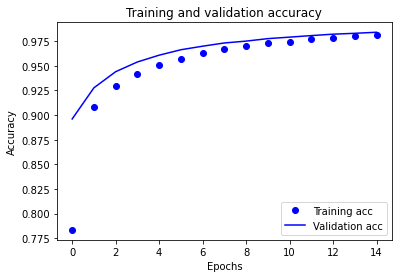

In [132]:
import matplotlib.pyplot as plt 
plt.clf()   # clear figure
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [142]:
y_pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [133]:
results = model.evaluate(x_test, y_test)

In [134]:
results

[0.051928310081213715, 0.98404]

In [143]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12500
           1       0.99      0.98      0.98     12500

    accuracy                           0.98     25000
   macro avg       0.98      0.98      0.98     25000
weighted avg       0.98      0.98      0.98     25000



In [117]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(50658,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=8, batch_size=64)
results = model.evaluate(x_test, y_test)

NameError: name 'train_vec' is not defined

In [40]:
results

[0.28497228040218353, 0.8840399980545044]